In [ ]:
import tensorflow as tf

from da_libraries.manage_data_for_ml import CNNModelUser

tf.random.set_seed(40)

%matplotlib inline
%load_ext tensorboard

In [2]:
cnn_model_user = CNNModelUser(test_size=0.20, random_state=40)

In [15]:
cnn_model_user.update_settings()

Should Flatten:  False
Split parameter:  data_split_by_0.2_period
Which Channel:  All
Should Normalize: True


In [16]:
cnn_model_user.load_train_test_data()


Should Flatten:  False
Split parameter:  data_split_by_0.2_period
Which Channel:  All
Should Normalize: True
Num of train data：21190 (0deg：1926 / 10deg：1926 / 20deg：1926 / 30deg：1927 / 40deg：1927 / 50deg：1926 / 60deg：1926 / 70deg：1926 / 80deg：1927 / 90deg：1926 / No Wind：1927)
Num of test data：5298 (0deg：482 / 10deg：482 / 20deg：482 / 30deg：481 / 40deg：481 / 50deg：482 / 60deg：482 / 70deg：482 / 80deg：481 / 90deg：482 / No Wind：481)


In [17]:
cnn_model_user.load_saved_model(get_the_best=True)
# cnn_model_user.load_saved_model(get_the_best=False)

In [18]:
cnn_model_user.load_history()

In [19]:
cnn_model_user.optimal_epochs()

,Metric,Optimal Epoch,Value at Optimal Epoch
0,loss,4886,1.462054
1,val_loss,4680,1.388105
2,accuracy,4798,0.450507
3,val_accuracy,4989,0.467909


In [21]:
tmp_result = cnn_model_user.evaluate_model()
tmp_result

166/166 [==============================] - 35s 4ms/step - loss: 1.3793 - accuracy: 0.4741
Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`


,Metric,Value
0,Test Accuracy,47.41411805152893 %
1,Estimation Time,343.75 ms
2,Memory used by the model,12.353536 MB
3,Model FLOPS,691.938 kFLOP/s


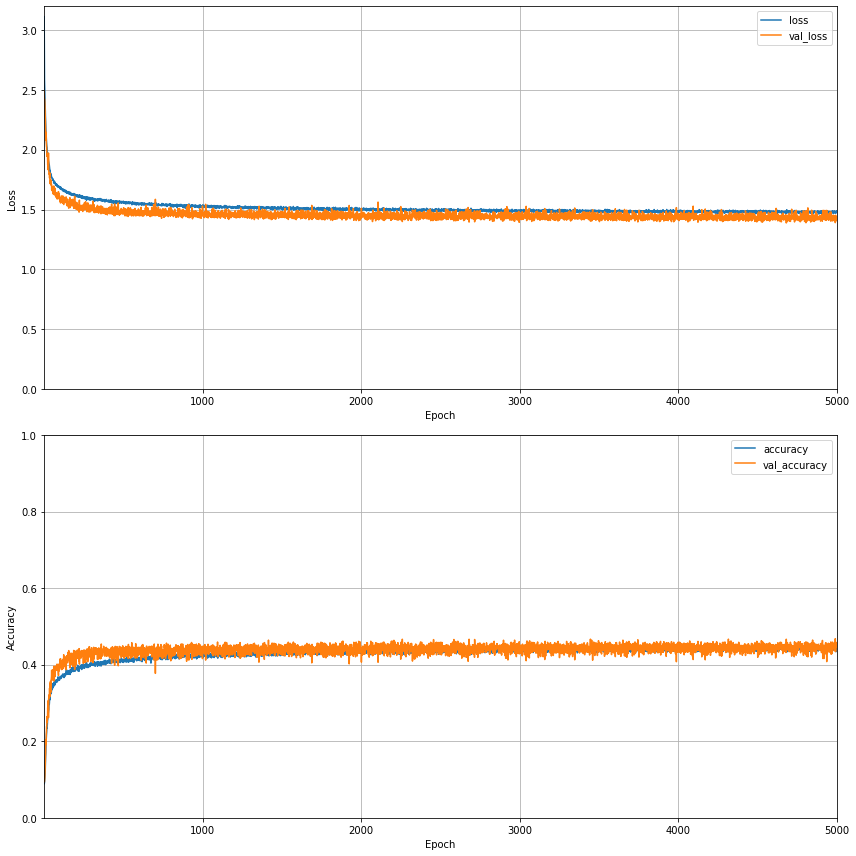

In [22]:
history_fig = cnn_model_user.plot_history()

In [ ]:
accuracy_num_fig = cnn_model_user.visualize_confusion_matrix(output_type="num")

In [ ]:
accuracy_percentage_fig = cnn_model_user.visualize_confusion_matrix(output_type="percentage")

In [ ]:
# 基本best_modelの場合しか保存しない！

cnn_model_user.save_accuracy()

In [172]:
cnn_model_user.chosen_parameter_folder_name

'data_split_by_0.1_period'

In [147]:
import pandas as pd



In [153]:
should_use_flatten_data = False
split_parameter = "data_split_by_0.1_period"
which_channel = ""
should_normalize = False

In [154]:
from settings.general_variables import *

cnn_model_user.should_use_flatten_data = should_use_flatten_data
cnn_model_user.chosen_parameter_folder_name = split_parameter
cnn_model_user.which_channel = which_channel
cnn_model_user.should_normalize = should_normalize

cnn_model_user.load_saved_model(get_the_best=True)
tmp_result = cnn_model_user.evaluate_model()

if cnn_model_user.which_channel:
    which_channel = " & ".join([DATA_COLUMN_NAMES[int(x) - 1] for x in cnn_model_user.which_channel])
else:
    which_channel = "All"

config = {
    "Should Flatten": should_use_flatten_data,
    "Split Parameter": split_parameter,
    "Which Channel": which_channel,
    "Should Normalize": should_normalize,
}

tmp_result = tmp_result.set_index("Metric").T
tmp_result = tmp_result.assign(**config).reset_index(drop=True)

33/33 [==============================] - 0s 11ms/step - loss: 0.0502 - accuracy: 0.9792


In [155]:
tmp_result

Metric,Test Accuracy,Estimation Time,Memory used by the model,Model FLOPS,Should Flatten,Split Parameter,Which Channel,Should Normalize
0,97.91666865348816 %,202.69205570220947 ms,12.304384 MB,20.453442 MFLOP/s,False,data_split_by_0.1_period,All,False


In [156]:
combined_results = pd.concat([combined_results, tmp_result]).reset_index(drop=True)

In [157]:
combined_results

,Metric,Test Accuracy,Estimation Time,Memory used by the model,Model FLOPS,Should Flatten,Split Parameter,Which Channel,Should Normalize
0,NaN,97.91666865348816 %,185.33542156219482 ms,12.304384 MB,20.453442 MFLOP/s,False,data_split_by_0.1_period,All,True
1,NaN,97.91666865348816 %,202.69205570220947 ms,12.304384 MB,20.453442 MFLOP/s,False,data_split_by_0.1_period,All,False


In [84]:

# 各モデルのresultデータフレームを再定義
result1 = pd.DataFrame([["Test Accuracy", "90%"],
                        ["Estimation Time", "183 ms"],
                        ["Memory used by the model", "12 MB"],
                        ["Model FLOPS", "20 MFLOP/s"]], columns=["Metric", "Value"])
result2 = pd.DataFrame([["Test Accuracy", "92%"],
                        ["Estimation Time", "150 ms"],
                        ["Memory used by the model", "10 MB"],
                        ["Model FLOPS", "25 MFLOP/s"]], columns=["Metric", "Value"])

# 各モデルの設定情報
config1 = {
    "should_flatten": False,
    "split_parameter": "1_period",
    "which_channel": "all",
    "should_normalize": False
}
config2 = {
    "should_flatten": True,
    "split_parameter": "2_periods",
    "which_channel": "channel_1",
    "should_normalize": True
}

# resultデータフレームに設定情報を追加
result1 = result1.set_index("Metric").T.assign(**config1).reset_index(drop=True)
result2 = result2.set_index("Metric").T.assign(**config2).reset_index(drop=True)

# データフレームの連結
combined_results = pd.concat([result1, result2]).reset_index(drop=True)

combined_results


Metric,Test Accuracy,Estimation Time,Memory used by the model,Model FLOPS,should_flatten,split_parameter,which_channel,should_normalize
0,90%,183 ms,12 MB,20 MFLOP/s,False,1_period,all,False
1,92%,150 ms,10 MB,25 MFLOP/s,True,2_periods,channel_1,True


In [82]:
import numpy as np

# モデルの重みをfloat16に変換
new_weights = [w.astype(np.float16) for w in cnn_model_user.model.get_weights()]
cnn_model_user.model.set_weights(new_weights)

In [83]:
tmp_result = cnn_model_user.evaluate_model()
tmp_result

33/33 [==============================] - 0s 11ms/step - loss: 30.5868 - accuracy: 0.0909


,Metric,Value
0,Test Accuracy,9.090909361839294 %
1,Estimation Time,183.80751609802246 ms
2,Memory used by the model,12.304384 MB
3,Model FLOPS,20.453442 MFLOP/s


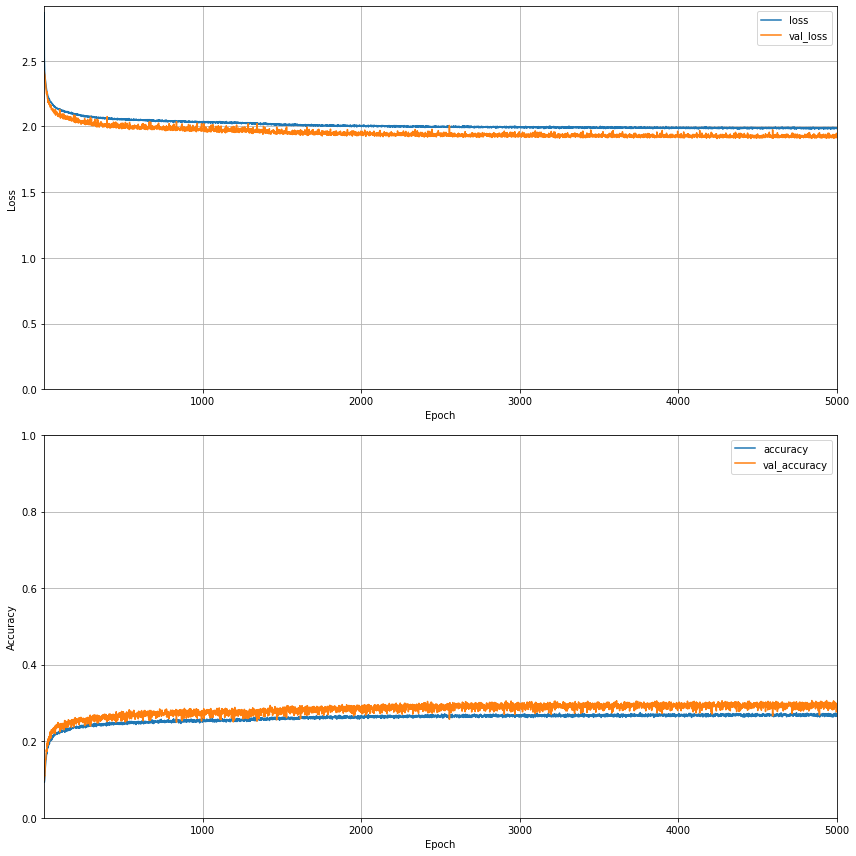

In [12]:
history_fig = cnn_model_user.plot_history()

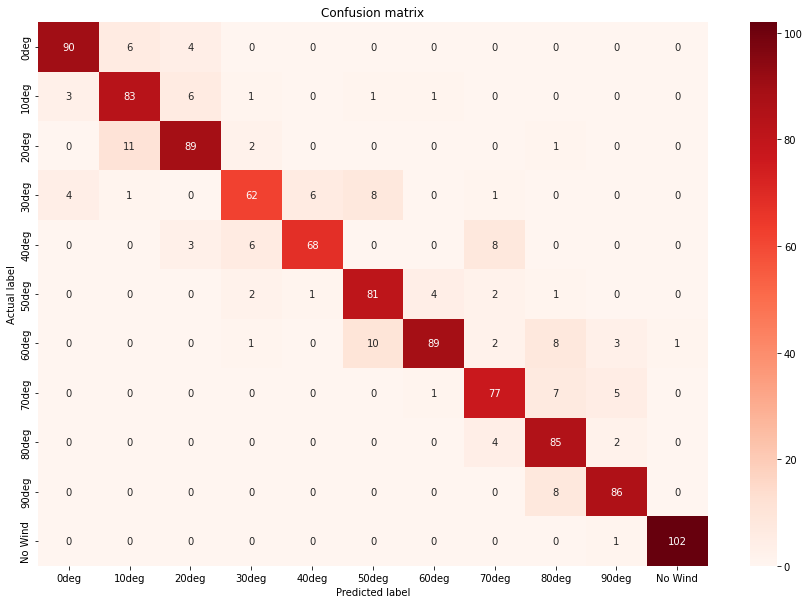

In [28]:
accuracy_num_fig = cnn_model_user.visualize_confusion_matrix(output_type="num")

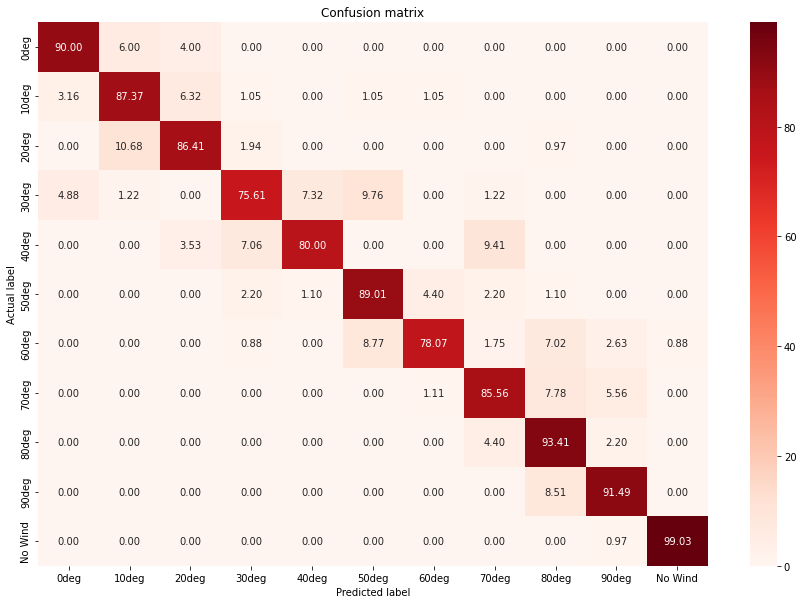

In [29]:
accuracy_percentage_fig = cnn_model_user.visualize_confusion_matrix(output_type="percentage")

In [30]:
# 基本best_modelの場合しか保存しない！

cnn_model_user.save_accuracy()